[View in Colaboratory](https://colab.research.google.com/github/redcican/Machine-Learning-Basic/blob/master/Support_Vector_Machine_Exercise.ipynb)

## 1. Using different SVM Kernels

In [1]:
print(__doc__)
"""
A comparison of using different SVM 
kernels, include 'linear', 'rbf',and
'poly'
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

Automatically created module for IPython interactive environment


In [0]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y !=0, :2]
y = y[y !=0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

In [0]:
X_train = X[:int(.9*n_sample)]
y_train = y[:int(.9*n_sample)]
X_test = X[int(.9*n_sample):]
y_test = y[int(.9*n_sample):]

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'linestyle'
  s)


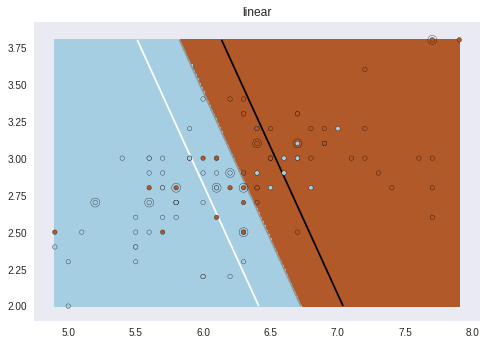

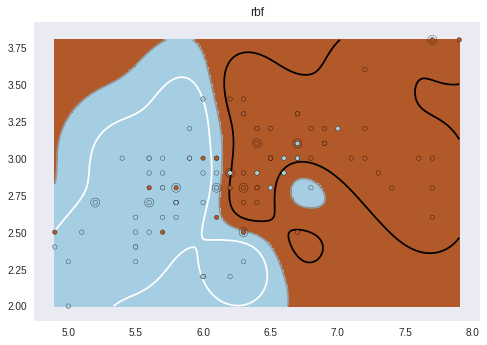

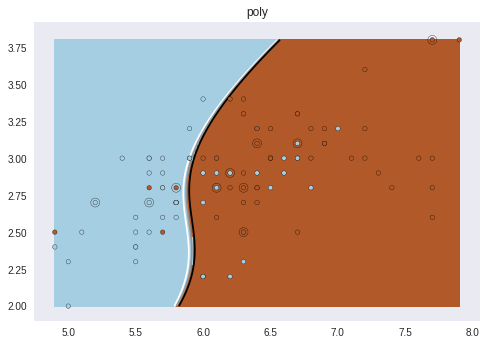

In [11]:
for fig_num, kernel in enumerate(('linear', 'rbf','poly')):
  clf = svm.SVC(kernel=kernel, gamma=10)
  clf.fit(X_train, y_train)
  
  plt.figure(fig_num)
  plt.clf()
  plt.scatter(X[:,0],X[:,1], c=y, zorder=10, cmap=plt.cm.Paired,
             edgecolor='k',s=20)
  plt.scatter(X_test[:,0],X_test[:,1], s=80, facecolor='none',
             zorder=10, edgecolor='k')
  
  plt.axis('tight')
  x_min = X[:,0].min()
  x_max = X[:,0].max()
  y_min = X[:,1].min()
  y_max = X[:,1].max()
  
  XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
  Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
  
  Z = Z.reshape(XX.shape)
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
  plt.contour(XX, YY, Z, color=['k','k','k'],
             linestyle=['--','-','--'], levels=[-0.5, 0, .5])
  plt.title(kernel)
  
plt.style.use('seaborn-white')
plt.show()